# Telco Data

Working notebook for telco project

In [1]:
import acquire_telco
import prepare_telco

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import math

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

We will aquire the telco data from the Codeup SQL database using a function stored in acquire_telco.py.

In [2]:
# import acquire_telco.py
import acquire_telco

In [3]:
# acquire
df = acquire_telco.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


## Prepare

Here we will prepare the data using functions stored in prepare_telco.py. 
We are going to use this data to develop a model, therefore we need to make sure there are no incompatible datatypes, and we are left with only clean columns that are useful. We will also need to split the data into train, validate, test so that we can test the accuracy of our model. 

We will run the clean_split_telco_data function that runs both the wrangle_telco and the train_validate_test_split functions. 

The wrangle_telco data will do the following:
- remove duplicates
- drop whitespaces
- drop the columns that don't seem useful: 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', and 'gender'
- converts 'total_charges' from and object to a float
- converts the binary categorical variables to numeric: 'tenure', 'churn', 'partner', 'dependents', 'paperless_billing', 'phone_service', 'multiple_lines', 'online_security', 'streaming_movies', 'streaming_tv', 'online_backup', 'device_protection', 'tech_support', 'is_autopay'
- gets dummies from non-binary object varibales 
- concatenate dummy dataframe to original 
- drop the object columns we created dummies from 
- returns the cleaned df

The train_validate_test_split function will do the following: 

- takes in a dataframe (df) and returns 3 dfs (train, validate, and test) split 20%, 24%, 56% respectively 
- takes in a random seed for replicating results

In [4]:
# import prepare_telco.py
import prepare_telco

In [5]:
# run functions from prepare_teco.py to prepare and split the data
train, validate, test = prepare_telco.clean_split_telco_data(df)

In [6]:
train.shape

(3937, 30)

In [7]:
validate.shape

(1688, 30)

In [8]:
test.shape

(1407, 30)

In [9]:
# verify the df we brought in is what we want
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,contract_type_month_to_month,contract_type_one_year,contract_type_two_year,internet_service_type_DSL,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_auto,payment_type_credit_card_auto,payment_type_electronic_check,payment_type_mailed_check
6096,0,1,0,70,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1603,0,1,1,15,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
5350,1,1,0,52,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
2068,0,0,0,39,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6366,0,1,0,32,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [10]:
# check that datatypes are all compatible for modeling
train.dtypes

senior_citizen                         int64
partner                                int64
dependents                             int64
tenure                                 int64
phone_service                          int64
multiple_lines                         int64
online_security                        int64
online_backup                          int64
device_protection                      int64
tech_support                           int64
streaming_tv                           int64
streaming_movies                       int64
paperless_billing                      int64
monthly_charges                      float64
total_charges                        float64
churn                                  int64
contract_type                         object
internet_service_type                 object
payment_type                          object
is_autopay                              bool
contract_type_month_to_month           uint8
contract_type_one_year                 uint8
contract_t

## Explore

Here we will explore the telco data to find the key drivers of customer churn. 

We will ask some initial questions and and answer thoes questions through visuals, statistics, or both. 

Initial Questions:
    
    1. Are customers with a certain service type more or less likely to churn? 
      - Specifically are customers with fiber more likely to churn? 
    2. What month are customers most likely to churn in?  
        - Does this depend on their contract/service type? 
    3. Do the customers that churn have a higher monthly cost than those that do not churn? 
    4. Do the customers that churn havel more or less lines than those how don't? 


Before we can start to run stat tests and create visuals, we need to create variables to make things simpler.

In [11]:
# We know know telco wants to focus on the cause of m2m churn so we will start there
m2m_churn = train[['contract_type']][(train['churn'] == 1)]
m2m_no_churn = train[['contract_type']][(train['churn'] == 0)]

In [12]:
internet_churn = train[['internet_service_type']][(train['churn'] == 1)]
intecrnet_no_churn = train[['internet_service_type']][(train['churn'] == 0)]

In [13]:
internet_churn.head()

,internet_service_type
6947,None
6791,None
3879,Fiber optic
3474,Fiber optic
4594,Fiber optic


In [14]:
fiber_churn = train[['internet_service_type_fiber_optic']][(train['churn'] == 1)]
fiber_no_churn = train[['internet_service_type_fiber_optic']][(train['churn'] == 0)]

In [15]:
tenure_churn = train[['tenure']][(train['churn'] == 1)]
tenure_no_churn = train[['tenure']][(train['churn'] == 0)]

In [16]:
tenure_churn

,tenure
6947,1
6791,1
3879,6
3474,3
4594,12
...,...
4674,1
3381,66
1577,3
3993,45


In [17]:
stats = tenure_churn.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
tenure,1046.0,18.471319,20.088146,1.0,2.0,10.0,30.75,72.0


In [18]:
# tenure_no_churn.head()

In [19]:
# stats = tenure_no_churn.describe().T
# stats

In [20]:
stats = train.tenure.describe().T
stats

count    3937.000000
mean       32.505715
std        24.773712
min         1.000000
25%         8.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [21]:
internet_churn.value_counts()

internet_service_type
Fiber optic              716
DSL                      266
None                      64
dtype: int64

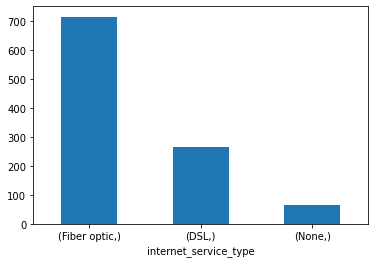

In [22]:
internet_churn.value_counts().plot.bar(rot=0);

In [23]:
m2m_churn.value_counts()

contract_type 
Month-to-month    926
One year           86
Two year           34
dtype: int64

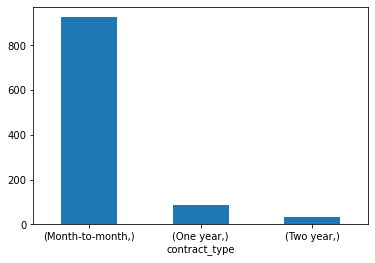

In [24]:
m2m_churn.value_counts().plot.bar(rot=0);

In [26]:
tenure_churn.value_counts()

tenure
1         213
2          65
3          56
4          49
5          36
7          27
6          25
10         24
15         23
12         23
9          22
11         21
8          20
14         17
16         16
13         16
18         12
22         12
32         11
53         11
24         11
25         11
17         11
19         10
21         10
41         10
39         10
49          9
40          9
38          9
37          9
27          9
26          9
47          8
34          8
54          8
20          8
30          8
43          8
68          7
33          7
50          7
23          7
66          7
58          7
59          7
70          7
28          7
35          7
46          6
42          6
65          6
29          6
56          6
31          6
71          5
62          5
60          5
52          5
51          5
48          5
57          4
55          4
67          4
36          4
72          4
63          3
45          3
69          3
44          3
61          2

In [27]:
# tenure_churn.value_counts().plot.bar(rot=0);

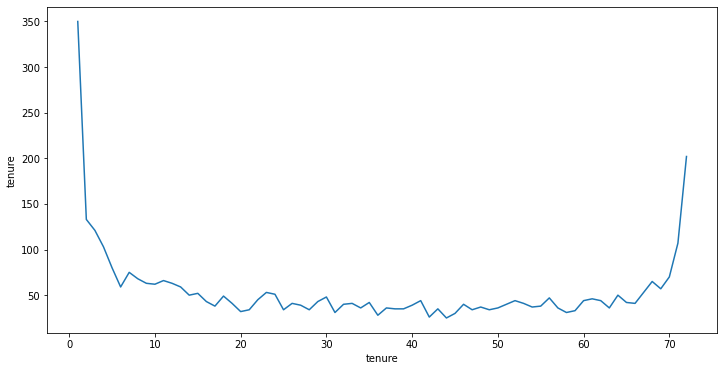

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=train.groupby(by='tenure')['tenure'].count().index, y=train.groupby(by='tenure')['tenure'].count());


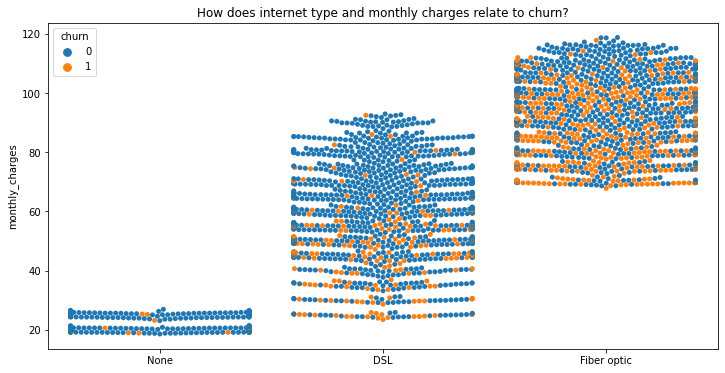

In [34]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='internet_service_type', y='monthly_charges', data=train , hue='churn'  )

plt.title('How does internet type and monthly charges relate to churn?')
plt.xlabel('')
plt.show()

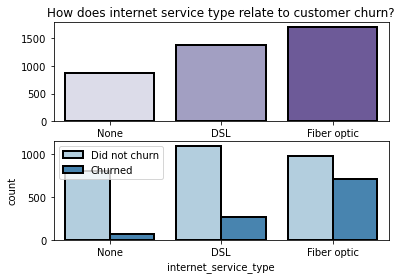

In [30]:
plt.subplot(211)

sns.countplot(x = 'internet_service_type', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('How does internet service type relate to customer churn?')
plt.xlabel('')
plt.ylabel('')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'internet_service_type', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2)

plt.legend(['Did not churn', 'Churned'])

plt.show()


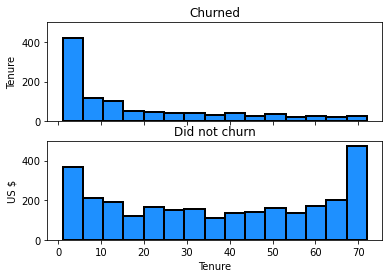

In [31]:
# Create figure and axes, 2 rows and 1 column, share x and y axes.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

# Plot first histogram from survived subset, fare variable.
ax1.hist(train[train.churn == 1].tenure, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax1.set(title='Churned', ylabel='Tenure')

# Plot second historgram from did not survive subset, fare variable.
ax2.hist(train[train.churn == 0].tenure, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax2.set(title='Did not churn', xlabel='Tenure', ylabel='US $')

plt.show()


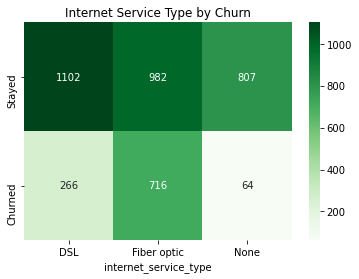

In [32]:
# Create crosstab with raw values.
ctab = pd.crosstab(train.churn, train['internet_service_type'])

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='d')

plt.title('Internet Service Type by Churn')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Stayed', 'Churned'))

plt.show()


1. Are customers with a certain service type more or less likely to churn? 
  - Specifically are customers with fiber more likely to churn?

## Modeling

In [35]:
X_train = train.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_test = test[['churn']]


In [36]:
X_train.dtypes

senior_citizen                         int64
partner                                int64
dependents                             int64
tenure                                 int64
phone_service                          int64
multiple_lines                         int64
online_security                        int64
online_backup                          int64
device_protection                      int64
tech_support                           int64
streaming_tv                           int64
streaming_movies                       int64
paperless_billing                      int64
monthly_charges                      float64
total_charges                        float64
is_autopay                              bool
contract_type_month_to_month           uint8
contract_type_one_year                 uint8
contract_type_two_year                 uint8
internet_service_type_DSL              uint8
internet_service_type_fiber_optic      uint8
internet_service_type_None             uint8
payment_ty

In [37]:
y_train.dtypes

churn    int64
dtype: object

In [38]:
train.churn.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

In [39]:
baseline = y_train.mode()

In [40]:
baseline

,churn
0,0


In [44]:
match_bsl_prediction = y_train == 0

In [45]:
baseline_accuracy = match_bsl_prediction.mean()

In [46]:
# basline accuracy = 73%
baseline_accuracy

churn    0.734315
dtype: float64

### Decision Tree

In [47]:
tree1_clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [48]:
tree1_clf = tree1_clf.fit(X_train, y_train)

In [49]:
#visualize the decision tree
import graphviz
from graphviz import Graph

dot_data = export_graphviz(tree1_clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [50]:
y_pred = tree1_clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [51]:
y_pred_proba = tree1_clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.97229219, 0.02770781],
       [0.77721088, 0.22278912],
       [0.58823529, 0.41176471],
       [0.77721088, 0.22278912],
       [0.97229219, 0.02770781]])

In [52]:
# accuracy:

In [53]:
print('Accuracy of Decision Tree 1 classifier on training set: {:.2f}'
      .format(tree1_clf.score(X_train, y_train)))

Accuracy of Decision Tree 1 classifier on training set: 0.79


In [66]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

[[2719  172]
 [ 643  403]]


In [67]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2719,172
1,643,403


In [68]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.39      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [69]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.808745,0.700870,0.79299,0.754807,0.780084
recall,0.940505,0.385277,0.79299,0.662891,0.792990
f1-score,0.869663,0.497224,0.79299,0.683443,0.770711
support,2891.000000,1046.000000,0.79299,3937.000000,3937.000000


In [72]:
# If not churn is our positive case
TP = 2719
FP = 172
FN = 643
TN = 403
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7929895859791719
True Positive Rate: 0.8087447947650208
False Positive Rate: 0.2991304347826087
True Negative Rate: 0.7008695652173913
False Negative Rate: 0.1912552052349792
Precision: 0.9405050155655482
Recall: 0.8087447947650208
F1 Score: 0.8696625619702542
Support (0): 3362
Support (1): 575


In [73]:
max_depth = 16

for i in range(1, max_depth):
    # Create Model
    depth = max_depth - i
    n = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.995154     0.984733   0.99238     0.989943      0.992385
recall        0.994466     0.986616   0.99238     0.990541      0.992380
f1-score      0.994810     0.985673   0.99238     0.990242      0.992382
support    2891.000000  1046.000000   0.99238  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.933090     0.919390  0.929896     0.926240      0.929450
recall        0.974403     0.806883  0.929896     0.890643      0.929896
f1-score      0.953299     0.859470  0.929896     0.906385      0.928371
support    2891.000000  1046.000000  0.929896  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.898151     0.857143  0.889256     0.877647      0.887256
recall        0.957800     0.699809  0.889256  

In [78]:
threshold = 0.10  #threshold set for amount of overfit that is tolerated

models = []
metrics = []

for i in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    #^^^ creates the model
    
    tree = tree.fit(X_train, y_train)   #fit model to train data and only TRAIN data
    
    in_sample_accuracy = tree.score(X_train, y_train)
    out_sample_accuracy = tree.score(X_validate, y_validate)
    #^^^evaluates the models performance on train data first
    
    difference = in_sample_accuracy - out_sample_accuracy
    #^^calculates the difference in accuracy
    
    if difference > threshold:
        break
    #^^adds conditions to check the accuracy vs the threshold
    
    output = {
        'max_depth': i,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_sample_accuracy,
        'difference': difference}
    #^^^formats the output for each models performance o train and validate
    
    metrics.append(output)
    
    models.append(output)
    
model_df = pd.DataFrame(metrics)
model_df["difference"] = model_df.train_accuracy - model_df.validate_accuracy


model_df.head()

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.767082,0.752962,0.014119
2,3,0.792990,0.792062,0.000928
3,4,0.793498,0.790877,0.002621
4,5,0.807722,0.775474,0.032248


best model: 


2	3	0.792990	0.792062	0.000928

### Random Forest

In [79]:
# create model
rf1_clf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

In [80]:
rf1_clf

RandomForestClassifier(max_depth=10, random_state=123)

In [81]:
rf1_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [82]:
print(rf1_clf.feature_importances_)

[0.01886718 0.01602698 0.01489466 0.15082057 0.00882784 0.0144629
 0.03165066 0.01571731 0.01268921 0.02527509 0.01375405 0.01318571
 0.02339307 0.14458664 0.15197846 0.01260945 0.10040794 0.02282037
 0.03782997 0.0172297  0.06062208 0.02237393 0.00829649 0.00917794
 0.04260925 0.00989254]


In [83]:
y_pred = rf1_clf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [84]:
y_pred_proba = rf1_clf.predict_proba(X_train)

In [85]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1_clf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.89


In [87]:
print(confusion_matrix(y_train, y_pred))

[[2754  137]
 [ 283  763]]


In [88]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2754,137
1,283,763


In [89]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2891
           1       0.85      0.73      0.78      1046

    accuracy                           0.89      3937
   macro avg       0.88      0.84      0.86      3937
weighted avg       0.89      0.89      0.89      3937



In [90]:
class_report = classification_report(y_train, y_pred, output_dict=(True))
print("Tree1 depth")
pd.DataFrame(class_report)

Tree1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.906816,0.847778,0.89332,0.877297,0.891130
recall,0.952612,0.729446,0.89332,0.841029,0.893320
f1-score,0.929150,0.784173,0.89332,0.856661,0.890632
support,2891.000000,1046.000000,0.89332,3937.000000,3937.000000


In [91]:
# If not churned is our positive case
TP = 2754
FP = 137
FN = 283
TN = 763
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8933197866395732
True Positive Rate: 0.9068159367797168
False Positive Rate: 0.15222222222222223
True Negative Rate: 0.8477777777777777
False Negative Rate: 0.09318406322028318
Precision: 0.9526115530958146
Recall: 0.9068159367797168
F1 Score: 0.9291497975708501
Support (0): 3037
Support (1): 900


In [92]:
max_depth = 16

for i in range(1, max_depth):
    # Create Model
    depth = max_depth - i
    n = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.995154     0.984733   0.99238     0.989943      0.992385
recall        0.994466     0.986616   0.99238     0.990541      0.992380
f1-score      0.994810     0.985673   0.99238     0.990242      0.992382
support    2891.000000  1046.000000   0.99238  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.933090     0.919390  0.929896     0.926240      0.929450
recall        0.974403     0.806883  0.929896     0.890643      0.929896
f1-score      0.953299     0.859470  0.929896     0.906385      0.928371
support    2891.000000  1046.000000  0.929896  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.898151     0.857143  0.889256     0.877647      0.887256
recall        0.957800     0.699809  0.889256  

In [97]:
metrics = []
max_depth = 16

for i in range(1, max_depth):
    # Create model
    depth = max_depth - i
    n = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,15,0.992380,0.779621,0.212759
1,2,14,0.929896,0.781398,0.148498
2,3,13,0.889256,0.789692,0.099564
3,4,12,0.872746,0.788507,0.084239
4,5,11,0.856236,0.795024,0.061212
5,6,10,0.846076,0.794431,0.051644
6,7,9,0.837440,0.793839,0.043601
7,8,8,0.825756,0.794431,0.031324
8,9,7,0.822200,0.795616,0.026584
9,10,6,0.813056,0.799171,0.013885


best model:

10	11	5	0.805436	0.800948	0.004488



### KNN

In [98]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred = knn.predict(X_train)

In [101]:
#y_pred
y_pred_proba = knn.predict_proba(X_train)

In [102]:
# Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [103]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

[[2665  226]
 [ 471  575]]


In [104]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2665,226
1,471,575


In [105]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2891
           1       0.72      0.55      0.62      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.74      0.75      3937
weighted avg       0.81      0.82      0.81      3937



In [106]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.849809,0.717853,0.822962,0.783831,0.814750
recall,0.921826,0.549713,0.822962,0.735770,0.822962
f1-score,0.884354,0.622631,0.822962,0.753493,0.814818
support,2891.000000,1046.000000,0.822962,3937.000000,3937.000000


In [107]:
# If no churn is our positive case
TP = 2665
FP = 226
FN = 471
TN = 575
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8229616459232918
True Positive Rate: 0.8498086734693877
False Positive Rate: 0.28214731585518105
True Negative Rate: 0.717852684144819
False Negative Rate: 0.15019132653061223
Precision: 0.9218263576617087
Recall: 0.8498086734693877
F1 Score: 0.8843537414965986
Support (0): 3136
Support (1): 801


In [108]:
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn = knn.fit(X_train, y_train)
    
    # predict on train
    y_pred = knn.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"KNN with k value of {k}")
    print(pd.DataFrame(report))
    print()

KNN with k value of 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.997925     0.994264  0.996952     0.996094      0.996952
recall        0.997925     0.994264  0.996952     0.996094      0.996952
f1-score      0.997925     0.994264  0.996952     0.996094      0.996952
support    2891.000000  1046.000000  0.996952  3937.000000   3937.000000

KNN with k value of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.836032     1.000000  0.855982     0.918016      0.879596
recall        1.000000     0.457935  0.855982     0.728967      0.855982
f1-score      0.910695     0.628197  0.855982     0.769446      0.835639
support    2891.000000  1046.000000  0.855982  3937.000000   3937.000000

KNN with k value of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.879530     0.774600  0.856236     0.827065      0.851652
recall        0.931857     0.647228  0.856236     0.7895

In [110]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)


df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,k,train_accuracy,validate_accuracy,difference
0,1,0.996952,0.712678,0.284274
1,2,0.855982,0.759479,0.096503
2,3,0.856236,0.745853,0.110383
3,4,0.825248,0.766588,0.058660
4,5,0.822962,0.763626,0.059336
5,6,0.817882,0.763033,0.054848
6,7,0.816104,0.763626,0.052478
7,8,0.804420,0.774289,0.030131
8,9,0.807976,0.768365,0.039611
9,10,0.804166,0.776066,0.028099


Best model: 

19	20	0.790450	0.782583	0.007867

### Logistic Regression

In [116]:
# Create the model
logit = LogisticRegression(random_state=123)

In [117]:
# Choose the features that carry the most weight
features = ['tenure', 'paperless_billing', 'monthly_charges', 'total_charges', 'contract_type_month_to_month', 'internet_service_type_fiber_optic', 'payment_type_electronic_check']

In [119]:
# Fit the model with the features we've selected
logit.fit(X_train[features], y_train)

LogisticRegression(random_state=123)

In [121]:
# predict on the same features we fit on
y_pred = logit.predict(X_train[features])

In [125]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using: 'tenure', 'paperless_billing', 'monthly_charges', 'total_charges', 'contract_type_month_to_month', 'internet_service_type_fiber_optic', 'payment_type_electronic_check'")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))


Baseline is churn    0.73
dtype: float64
Logistic Regression using: 'tenure', 'paperless_billing', 'monthly_charges', 'total_charges', 'contract_type_month_to_month', 'internet_service_type_fiber_optic', 'payment_type_electronic_check'
Accuracy of Logistic Regression classifier on training set: 0.79


In [126]:
# Create 2nd model
logit2 = LogisticRegression(random_state=123)

In [135]:
# Fit on all features
logit2.fit(X_train, y_train)

In [136]:
print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.81


In [142]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.75


In [143]:
# Only tenure 
features = ["tenure"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.73


In [145]:
# paperless_billing
features = ["paperless_billing"]

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression(random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')


All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.73


In [146]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is churn    0.73
dtype: float64
Accuracy of this Logistic Regression on training set: 0.79


In [152]:
logit3.score(X_validate, y_validate)

0.7245260663507109

In [155]:
train_accuracy = logit3.score(X_train, y_train)
validate_accuracy = logit3.score(X_validate, y_validate)

In [156]:
difference = train_accuracy - validate_accuracy
difference

0.024521431744285227

In [148]:
logit2.score(X_validate, y_validate)

0.7896919431279621

In [157]:
train_accuracy = logit2.score(X_train, y_train)
validate_accuracy = logit2.score(X_validate, y_validate)

In [159]:
difference = train_accuracy - validate_accuracy
difference

0.015743667743259637

In [153]:
logit6.score(X_validate, y_validate)

0.7890995260663507

In [160]:
train_accuracy = logit6.score(X_train, y_train)
validate_accuracy = logit6.score(X_validate, y_validate)

In [161]:
difference = train_accuracy - validate_accuracy
difference

-0.003983955835210273

Best model:

logit2

In [163]:
metrics = []

# loop through different values of c
for c in range(1, 10):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remmeber only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "c": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)


df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,c,train_accuracy,validate_accuracy,difference
0,1,0.805436,0.789692,0.015744
1,2,0.804928,0.790877,0.014051
2,3,0.805436,0.790877,0.014559
3,4,0.805436,0.786730,0.018706
4,5,0.805436,0.790284,0.015151
5,6,0.805182,0.790284,0.014897
6,7,0.805436,0.791469,0.013966
7,8,0.805182,0.790284,0.014897
8,9,0.805182,0.790284,0.014897


Best model: 

8	9	0.805182	0.790284	0.014897

In [164]:
y_pred_proba = logit2.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.995524,0.004476
1,0.764354,0.235646
2,0.527703,0.472297
3,0.737307,0.262693
4,0.976584,0.023416


In [167]:
# All features and c=9
logit7 = LogisticRegression(C=9, random_state=123)

logit7.fit(X_train, y_train)

y_pred = logit7.predict(X_train)

accuracy = logit7.score(X_train, y_train)

print("All Features and we're setting c to 9")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting c to 9
Accuracy of Logistic Regression classifier on training set: 0.81


In [168]:
logit7.score(X_validate, y_validate)

0.7902843601895735

In [169]:
train_accuracy = logit6.score(X_train, y_train)
validate_accuracy = logit6.score(X_validate, y_validate)

In [170]:
difference = train_accuracy - validate_accuracy
difference

-0.003983955835210273

In [175]:
y_pred_proba = logit7.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['no churn', 'churn'])
y_pred_proba.head()

,no churn,churn
0,0.995488,0.004512
1,0.766656,0.233344
2,0.527249,0.472751
3,0.737489,0.262511
4,0.977315,0.022685


In [174]:
y_pred_proba = logit3.predict_proba(X_validate)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['no churn', 'churn'])
y_pred_proba.head()

,no churn,churn
0,0.940298,0.059702
1,0.931481,0.068519
2,0.115327,0.884673
3,0.872691,0.127309
4,0.401907,0.598093


PREDICTIONS OUTPUT

### Test the Best Model

# =============================================================================
# PREDICTIONS OUTPUT
# =============================================================================
# csv_df = pd.DataFrame()
# csv_df['CustomerID'] = test['customer_id']
# csv_df['Prediction'] = rf2.predict(X_test)
# csv_df = csv_df.reset_index().drop(columns='index')

# proba_df = pd.DataFrame(model.predict_proba(X_test))

# output_df = pd.concat([csv_df, proba_df], axis=1)
# output_df.head()



proba_test = model.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=model.classes_.tolist())
proba_df.head()

reset_test = test.reset_index()

reset_test.head()



test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

test_proba_df['predicted'] = model.predict(X_test)
test_proba_df.head(20)


#write probability table to a csv called predictions
test_proba_df.to_csv('predictions.csv')

In [180]:
proba_train = model.predict_proba(X_train)
proba_df = pd.DataFrame(proba_train, columns=model.classes_.tolist())
proba_df.head()

reset_train = train.reset_index()

reset_train.head()



train_proba_df = pd.concat([reset_train, proba_df], axis=1)
train_proba_df.head()

train_proba_df['predicted'] = model.predict(X_train)
train_proba_df.head(20)


#write probability table to a csv called predictions
train_proba_df.to_csv('predictions.csv')